## Text Mining in Social Media - Bolsa de palabras por sexo

*En este notebook se detalla paso a paso todo el proceso de extracción de tuits de usuarios, su inserción en un DataFrame y el cálculo de las palabras más usadas en un sexo con respecto al otro.*

**1- Generamos dos diccionarios llamados ids_train e ids_test que contienen los ids de usuarios clasificados por variedad y sexo. Usamos para ello la función generar_dicc_ids**

Para ello abrimos el fichero truth.txt, que contiene estos campos en forma de csv separados por los caracteres ':::'.

In [1]:
def generar_dicc_ids(particion):
    # particion: 'train' o 'test'
    if particion=='train':
        f = open('./PAN-AP/training/truth.txt')
    else:
        f = open('./PAN-AP/test/truth.txt')
    
    contador=0
    sexo={'male':0,'female':0}
    variedades={'colombia':0,'argentina':0,'spain':0,'venezuela':0,'peru':0,'chile':0,'mexico':0}

    ids={'colombia':{'male':[],'female':[]},'argentina':{'male':[],'female':[]},'spain':{'male':[],'female':[]}, \
     'venezuela':{'male':[],'female':[]},'peru':{'male':[],'female':[]},'chile':{'male':[],'female':[]}, \
     'mexico':{'male':[],'female':[]}}

    for line in f:
        line=line.rstrip()
        if len(line)==0:
            continue
        lista=line.split(':::')

        ids[lista[2]][lista[1]].append(lista[0])

        sexo[lista[1]] += 1
        variedades[lista[2]] += 1
        contador+=1

    print(sexo)
    print(variedades)
    print(contador)

    return ids

ids_train = generar_dicc_ids('train')
ids_test  = generar_dicc_ids('test')

{'male': 1400, 'female': 1400}
{'colombia': 400, 'argentina': 400, 'spain': 400, 'venezuela': 400, 'peru': 400, 'chile': 400, 'mexico': 400}
2800
{'male': 700, 'female': 700}
{'colombia': 200, 'argentina': 200, 'spain': 200, 'venezuela': 200, 'peru': 200, 'chile': 200, 'mexico': 200}
1400


**Ejemplo de los diccionarios generados**

In [2]:
ids_train['spain']['male'][0:10]

['ef3588c9462713023145ae3c12c85614',
 '17e06a4ef15eaa851242465edc5328bd',
 'cfa38327f7699d48daaaaf4278a1354a',
 'e85fd98dfc6743bce7b274fbcac69f24',
 '826e3b4e72bfb6f9cdfc1a6995be10e5',
 'bf149d41c5e685054a57fb38d964735d',
 '79e9e99239fe662190978d62ebc4c24d',
 '2d56280a969d9dbcc4b32b21bc0a9b02',
 'b56c7a73e3bb2eb5436a3642b1fb70ee',
 '17786b7a4a1a31775af8ae786b4e4711']

**2- Definimos dos funciones:**

**flatstring:** recibe una lista de strings y los concatena devolviendo un único string. Añade un espacio en blanco entre uno y otro para que estén separados.

**leer_tuits:** recibe el id del usuario y a qué partición pertenece ('train' o 'test'). Devuelve los 100 tuits del usuario concatenados en un único string.

In [3]:
def flatstring(lista):
    s=""
    for item in lista:
        s+= " " + item
    return s

def leer_tuits(id,particion):
    if particion == 'train':
        s='./PAN-AP/training/' + id + '.xml'
    else:
        s='./PAN-AP/test/' + id + '.xml'
    f=open(s)
    tuits=list()
    for line in f:
        line=line.rstrip()
        if line.find('<document><![CDATA[') != -1:
            line=line[21:-14]
            tuits.append(line)
    return flatstring(tuits)

**3- Definimos la función generar_dataframe que devuelve un DataFrame de pandas con las columnas tuits, sexo y variedad. En cada fila de la columna tuits, se encuentran todos los tuits de un usuario concatenados en un único string.**

In [4]:
import pandas as pd

def generar_dataframe(ids,particion):
    # ids: ids_train o ids_test
    
    df = pd.DataFrame(columns = ['tuits','sexo','variedad'])

    i=0 # Contador del número de filas. Cada fila será un usuario.
    variedades_lista = ['argentina', 'chile', 'colombia', 'mexico', 'peru', 'spain', 'venezuela']
    sexo_lista = ['female','male']

    for variedad in variedades_lista:
        v=0 # contador del número de usuarios de una variedad
        print(variedad)
        
        for sexo in sexo_lista:
            s=0 # contador del número de usuarios de un sexo
            
            for id in ids[variedad][sexo]:
                t = leer_tuits(id,particion)
                df.loc[i] = [t,sexo,variedad]
                i+=1
                v+=1
                s+=1
            
            print("\t",sexo,s)
        
        print(v)
    
    return df


Generamos los DataFrames train y test.

In [5]:
train = generar_dataframe(ids_train, 'train')

argentina
	 female 200
	 male 200
400
chile
	 female 200
	 male 200
400
colombia
	 female 200
	 male 200
400
mexico
	 female 200
	 male 200
400
peru
	 female 200
	 male 200
400
spain
	 female 200
	 male 200
400
venezuela
	 female 200
	 male 200
400


In [6]:
test  = generar_dataframe(ids_test, 'test')

argentina
	 female 100
	 male 100
200
chile
	 female 100
	 male 100
200
colombia
	 female 100
	 male 100
200
mexico
	 female 100
	 male 100
200
peru
	 female 100
	 male 100
200
spain
	 female 100
	 male 100
200
venezuela
	 female 100
	 male 100
200


Ejemplo del DataFrame train

In [7]:
train.sample(n=10)

,tuits,sexo,variedad
1981,Jajajaja eso es cierto !! https://t.co/2bLH53...,male,peru
1994,@congresoperu vean inmediata ley para vetar x...,male,peru
1458,@rmartinelli Lo mismo aplica para tí ladronaz...,male,mexico
1224,"Nada se va, hasta que nos haya enseñado lo qu...",female,mexico
937,Nuevo Código es un paso importante para garan...,female,colombia
590,@rectaprovincia en tacna a lo más 5 soles el ...,female,chile
102,@ARIELCALFUCURA gracias🌷 @Guille_Felix gracia...,female,argentina
1554,@VamosConDuran04 saquemos alas ratas de toluc...,male,mexico
1542,"No es para tanto, tampoco exageres. Solo me m...",male,mexico
2722,no te va a gustar andar en ccs en 4runner 20...,male,venezuela


**4- Contamos las palabras más repetidas en hombres y en mujeres**

**Generamos dos diccionarios, wordcountHombre y wordcountMujer, que contienen la lista de palabras de cada sexo y su cuenta, omitiendo las stop_words.**

In [8]:
from stop_words import get_stop_words

wordcountHombre = {}
wordcountMujer = {}
c = 0
a =  get_stop_words('es')
for words in train["tuits"].str.split():
    if words not in a:
        
        if train["sexo"][c]== "female":
  
            for word in words:
                if word not in wordcountMujer:
                    wordcountMujer[word] = 1
                else:
                    wordcountMujer[word] += 1
        
        
        if train["sexo"][c]== "male":
            for word in words:
                if word not in wordcountHombre:
                    wordcountHombre[word] = 1
                else:
                    wordcountHombre[word] += 1
    c += 1


**Ordenamos las palabras de mayor a menor frecuencia absoluta.**

In [9]:
max_hombre = sorted(wordcountHombre.items(), key=lambda wordcountHombre: (-wordcountHombre[1], wordcountHombre[0]))
max_Mujer = sorted(wordcountMujer.items(), key=lambda wordcountHombre: (-wordcountHombre[1], wordcountHombre[0]))

Las palabras más repetidas en ambos sexos.

In [10]:
for i in range(10):
    print(max_hombre[i],max_Mujer[i])

('de', 71813) ('de', 60575)
('que', 42805) ('que', 42896)
('la', 39926) ('la', 34485)
('a', 34195) ('y', 31805)
('y', 33946) ('a', 30869)
('en', 33366) ('en', 27707)
('el', 33327) ('el', 25420)
('no', 20593) ('no', 20484)
('es', 17538) ('es', 15701)
('los', 16707) ('me', 15267)


**5- Para extraer información que diferencie ambos sexos, calculamos la frecuencia relativa inversa de las palabras de un sexo con respecto al otro.**

**Definimos la función listodict que transforma una lista de tuplas en diccionario.**

In [11]:
def listodict(lista):
    mx_dict ={}
    for key , value in lista:
      
        mx_dict[key]= value
    return mx_dict

mx_dictH = listodict(max_hombre)
mx_dictM = listodict(max_Mujer)    

**Comparamos la frecuencia de aparición de palabras entre hombres y mujeres haciendo un tfidf**

In [12]:
tfidfh = {}
for key, value in mx_dictH.items():
    if key in mx_dictM:
        tfidfh[key] = value * (1/mx_dictM[key])
        
tfidfm = {}
for key, value in mx_dictM.items():
    if key in mx_dictH:
        tfidfm[key] = value * (1/mx_dictH[key])

**Creamos una bolsa de palabras con las palabras que son al menos 3.2 veces más frecuentes en un sexo con respecto al otro.**

In [13]:
bag_word_h ={}
for key, value in tfidfh.items():
    if tfidfh[key] > 3.2: 
        bag_word_h[key]= mx_dictH[key]
        
bag_word_m ={}
for key, value in tfidfm.items():
    if tfidfm[key] > 3.2:
        bag_word_m[key]= mx_dictM[key]

**6- Dibujamos una nube de palabras para visualizar las palabras más usadas en cada sexo**

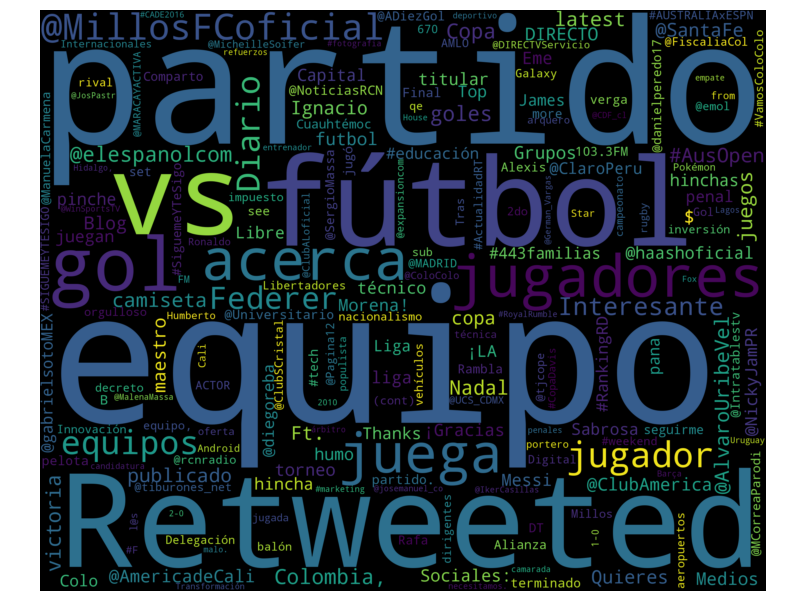

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nube = WordCloud( width=2500, height=2000).generate_from_frequencies(bag_word_h)
plt.figure(1,figsize=(13, 13))
plt.imshow(nube,interpolation="bilinear")
plt.axis("off")
plt.show()

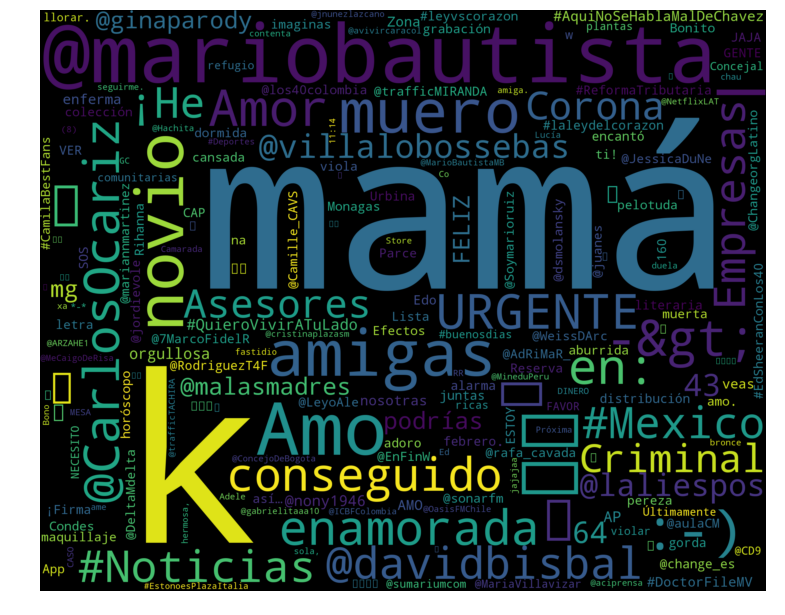

In [15]:
from wordcloud import WordCloud

nube = WordCloud( width=2500,height=2000).generate_from_frequencies(bag_word_m)#mx1_dict) 
plt.figure(1,figsize=(13, 13))
plt.imshow(nube,interpolation="bilinear")
plt.axis("off")
plt.show()

**Listamos las diez palabras más usadas por ambos sexos.**

In [16]:
def ordenar_dict_v(d):
    p=list() #Lista para ordenar el diccionario

    for i in d:
        p.append((d[i],i))
    p.sort(reverse=True) # De mayor a menor número
    
    return p #Devuelve una lista formada por tuplas: (cuenta, palabra)

bag_word_h_ord = ordenar_dict_v(bag_word_h)
bag_word_m_ord = ordenar_dict_v(bag_word_m)

In [17]:
for i in range(10):
    print(str(i)+"- "+str(bag_word_h_ord[i][0])+" "+bag_word_h_ord[i][1]+"\t"+
          str(bag_word_m_ord[i][0])+" "+bag_word_m_ord[i][1])

0- 823 equipo	384 k
1- 817 partido	353 mamá
2- 417 Retweeted	321 @mariobautista_
3- 361 fútbol	310 ❤️
4- 306 vs	263 Amo
5- 302 gol	214 novio
6- 291 jugadores	199 amigas
7- 287 acerca	178 muero
8- 257 juega	161 💕
9- 221 @MillosFCoficial	160 🙈
